<a href="https://colab.research.google.com/github/teobenko99/PRACTICA/blob/main/PRACTICA2R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



GRUPO 6- TP FINAL


# **LIMPIEZA DEL DATASET**

In [ ]:
install.packages("GGally")
install.packages("corrplot")
install.packages("leaps")
install.packages("gridExtra")
install.packages("psych")
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
library(readr)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(corrplot)
library(GGally)
library(leaps)
library(gridExtra)
library(readxl)
library(psych)
library(car)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(corrplot): there is no package called ‘corrplot’


In [ ]:
datos <- read_excel("/content/chicos25.xlsx") # chicos25.xlsx - datos.csv
str(datos)
dim(datos)
datos_original <- datos #guardamos el DS original por si lo volvemos a necesitar, sobre datos seguimos haciendo modificaciones

tibble [618 × 9] (S3: tbl_df/tbl/data.frame)
 $ id     : num [1:618] 1 2 3 4 5 6 7 8 9 10 ...
 $ mio    : chr [1:618] "Si" "No" "No" "Si" ...
 $ spheq  : num [1:618] -0.052 0.608 1.179 0.525 0.697 ...
 $ al     : num [1:618] 21.9 22.4 22.5 22.2 23.3 ...
 $ acd    : num [1:618] 3.69 3.7 3.46 3.86 3.68 ...
 $ vcd    : num [1:618] 14.7 15.3 15.5 14.7 16.2 ...
 $ sporthr: num [1:618] 40 4 14 18 14 10 12 12 4 30 ...
 $ tvhr   : num [1:618] 10 7 10 4 4 19 8 8 3 10 ...
 $ ma     : chr [1:618] "Si" "Si" "No" "No" ...


[1] 618   9

In [ ]:
summary(datos)
head(datos)
sum(duplicated(datos)) #verificación registros duplicados
sum(is.na(datos)) #verificación datos faltantes (NA)

       id            mio                spheq               al       
 Min.   :  1.0   Length:618         Min.   :-0.6990   Min.   :19.90  
 1st Qu.:155.2   Class :character   1st Qu.: 0.4562   1st Qu.:22.04  
 Median :309.5   Mode  :character   Median : 0.7290   Median :22.46  
 Mean   :309.5                      Mean   : 0.8010   Mean   :22.50  
 3rd Qu.:463.8                      3rd Qu.: 1.0340   3rd Qu.:22.97  
 Max.   :618.0                      Max.   : 4.3720   Max.   :24.56  
      acd             vcd           sporthr            tvhr       
 Min.   :2.772   Min.   :13.38   Min.   :  0.00   Min.   : 0.000  
 1st Qu.:3.424   1st Qu.:14.93   1st Qu.:  6.00   1st Qu.: 4.250  
 Median :3.585   Median :15.36   Median : 10.00   Median : 8.000  
 Mean   :3.579   Mean   :15.38   Mean   : 12.54   Mean   : 8.948  
 3rd Qu.:3.730   3rd Qu.:15.84   3rd Qu.: 16.00   3rd Qu.:12.000  
 Max.   :4.250   Max.   :17.30   Max.   :450.00   Max.   :31.000  
      ma           
 Length:618        
 

id,mio,spheq,al,acd,vcd,sporthr,tvhr,ma
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Si,-0.052,21.89,3.690,14.70,40,10,Si
2,No,0.608,22.38,3.702,15.29,4,7,Si
3,No,1.179,22.49,3.462,15.52,14,10,No
4,Si,0.525,22.20,3.862,14.73,18,4,No
5,No,0.697,23.29,3.676,16.16,14,4,Si
6,No,1.744,22.14,3.224,15.36,10,19,No


[1] 0

[1] 0

In [ ]:
datos <- datos[, -1]
datos$mio <- as.factor(datos$mio)
datos$ma <- as.factor(datos$ma)
summary(datos)

 mio          spheq               al             acd             vcd       
 No:537   Min.   :-0.6990   Min.   :19.90   Min.   :2.772   Min.   :13.38  
 Si: 81   1st Qu.: 0.4562   1st Qu.:22.04   1st Qu.:3.424   1st Qu.:14.93  
          Median : 0.7290   Median :22.46   Median :3.585   Median :15.36  
          Mean   : 0.8010   Mean   :22.50   Mean   :3.579   Mean   :15.38  
          3rd Qu.: 1.0340   3rd Qu.:22.97   3rd Qu.:3.730   3rd Qu.:15.84  
          Max.   : 4.3720   Max.   :24.56   Max.   :4.250   Max.   :17.30  
    sporthr            tvhr         ma     
 Min.   :  0.00   Min.   : 0.000   No:305  
 1st Qu.:  6.00   1st Qu.: 4.250   Si:313  
 Median : 10.00   Median : 8.000           
 Mean   : 12.54   Mean   : 8.948           
 3rd Qu.: 16.00   3rd Qu.:12.000           
 Max.   :450.00   Max.   :31.000           

# **ANÁLISIS UNIVARIADO/BIVARIADO**

### Graficos principales para realizar observaciones:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


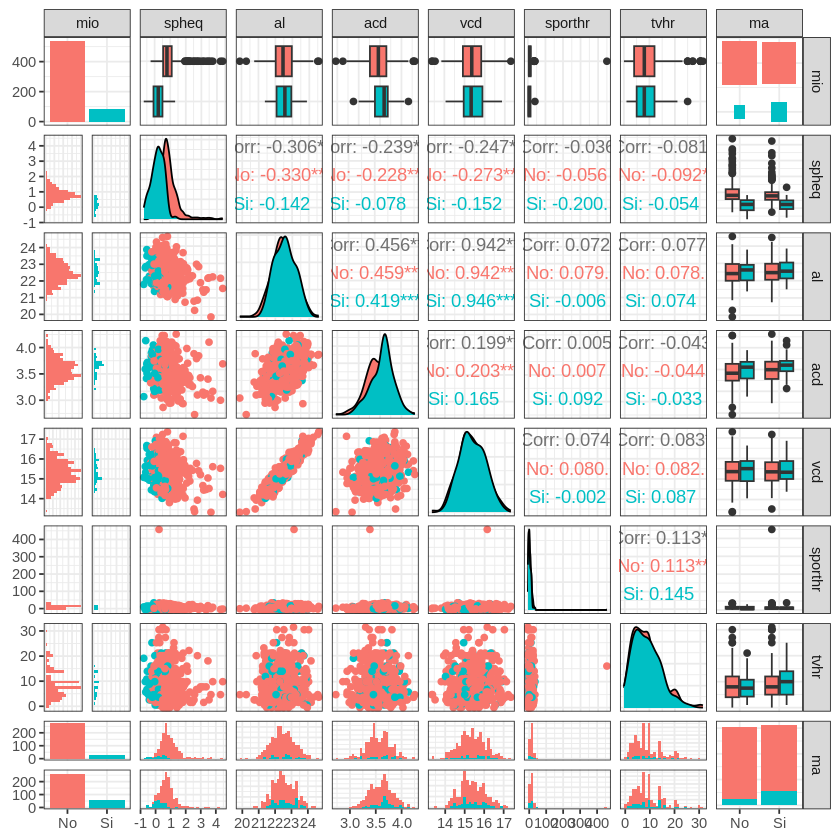

In [ ]:
# Pair Plot --> para observar diversos gráficos exploratorios
ggpairs(datos, mapping = aes(color = mio)) + theme_bw()

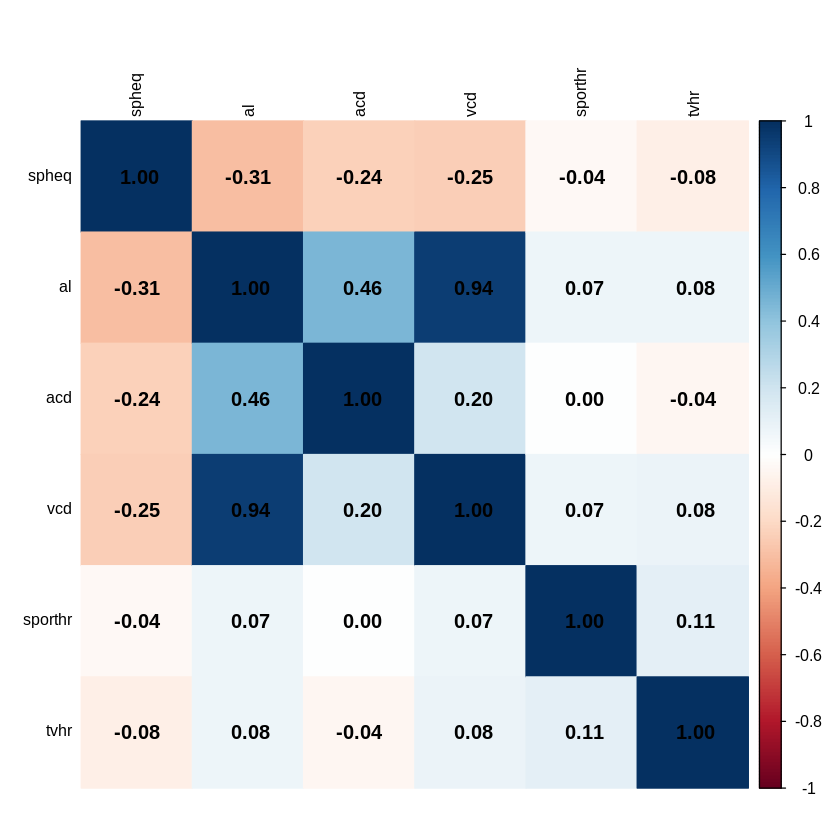

In [ ]:
#Matriz de correlación
num_vars <- c("spheq", "al", "acd", "vcd", "sporthr", "tvhr")
corrplot(
  cor(datos[num_vars]),
  method = "color",
  tl.col = "black",
  tl.cex = 0.8,
  addCoef.col = "black"
)

In [ ]:
# Matriz de correlación redondeada
mat_cor <- round(cor(datos[num_vars]), 2)

# Mostrar como tabla (en consola o notebook)
print(mat_cor)

        spheq    al   acd   vcd sporthr  tvhr
spheq    1.00 -0.31 -0.24 -0.25   -0.04 -0.08
al      -0.31  1.00  0.46  0.94    0.07  0.08
acd     -0.24  0.46  1.00  0.20    0.00 -0.04
vcd     -0.25  0.94  0.20  1.00    0.07  0.08
sporthr -0.04  0.07  0.00  0.07    1.00  0.11
tvhr    -0.08  0.08 -0.04  0.08    0.11  1.00


### Graficos adicionales:

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


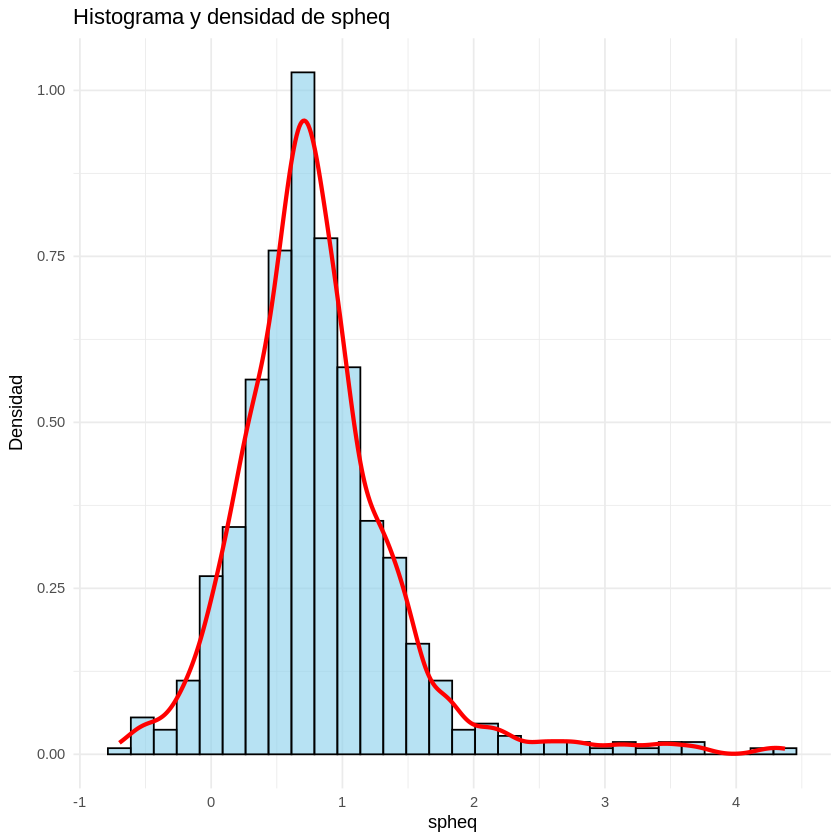

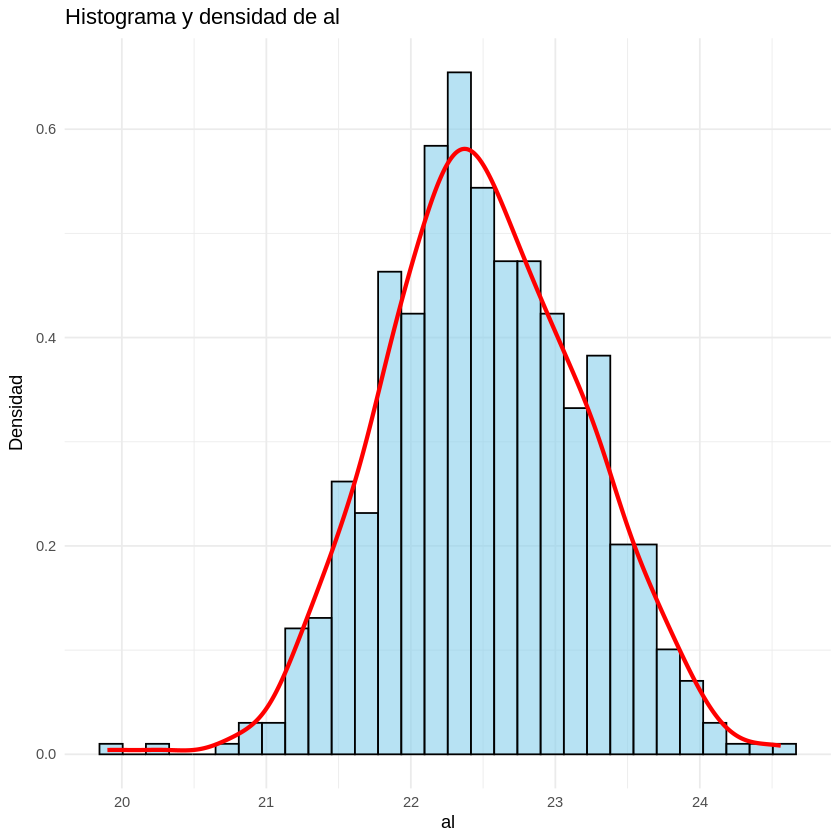

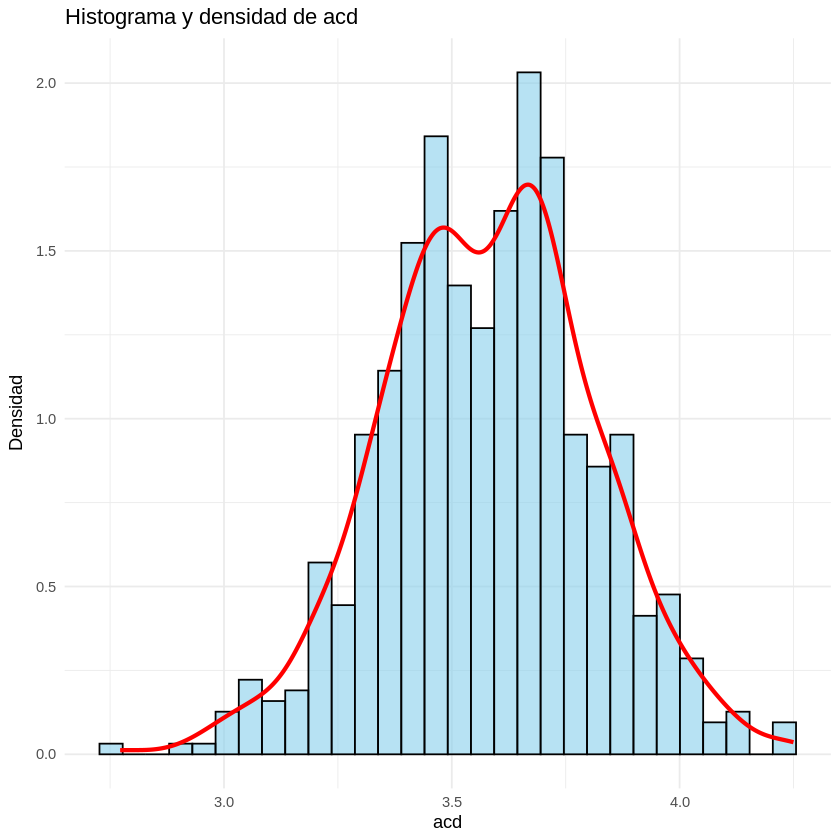

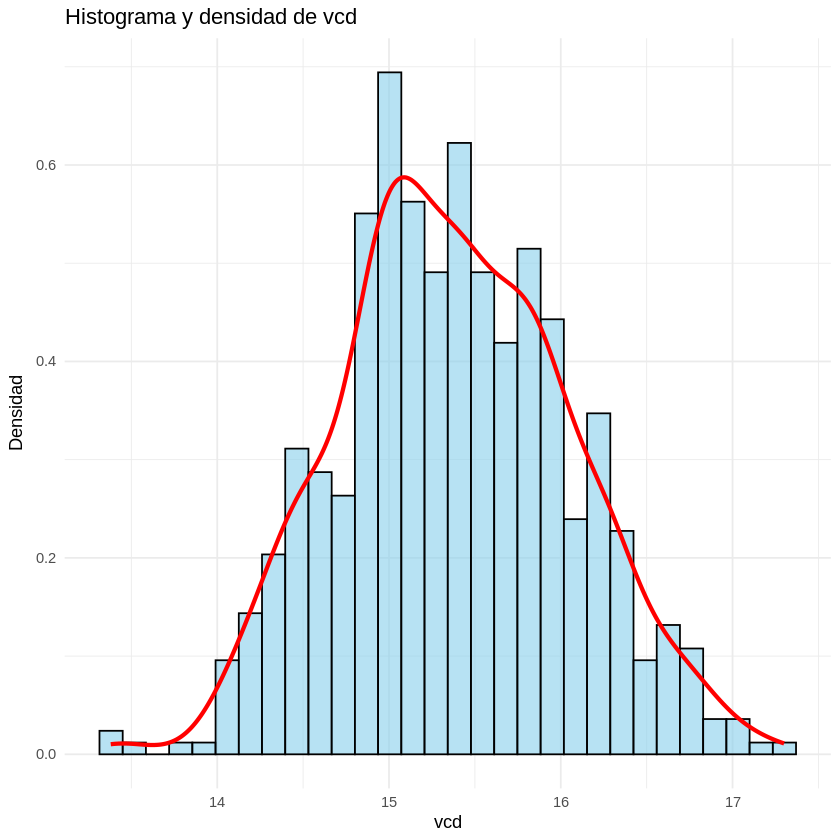

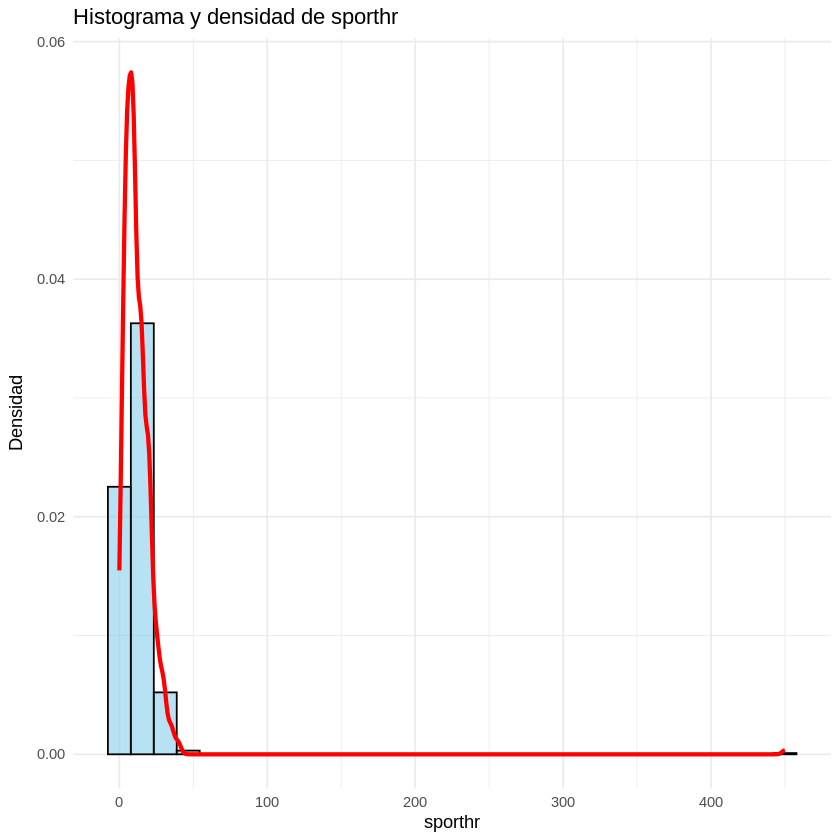

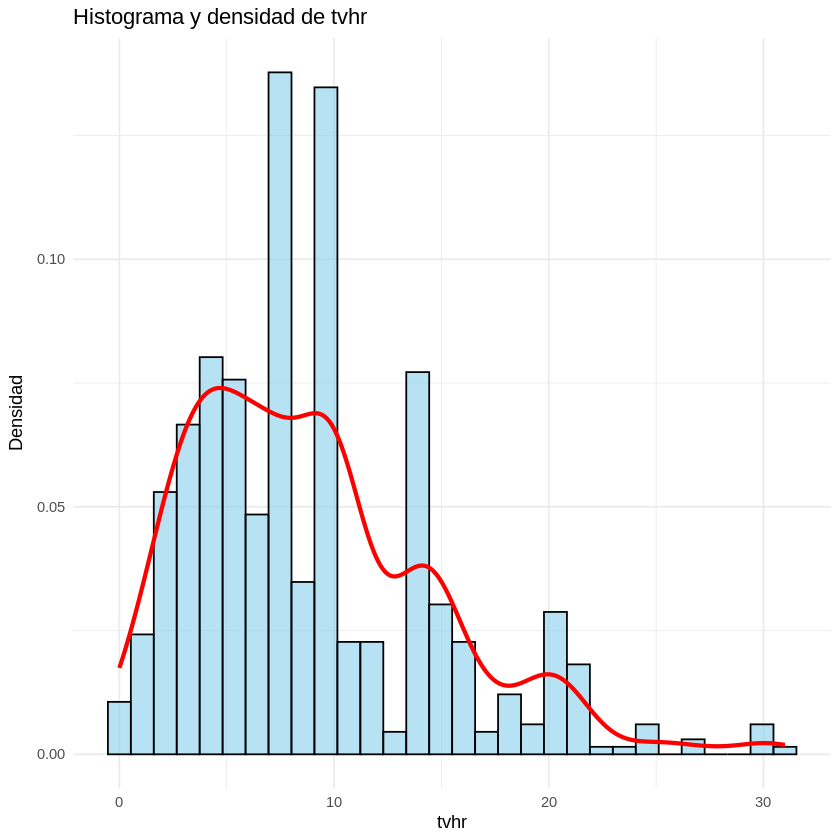

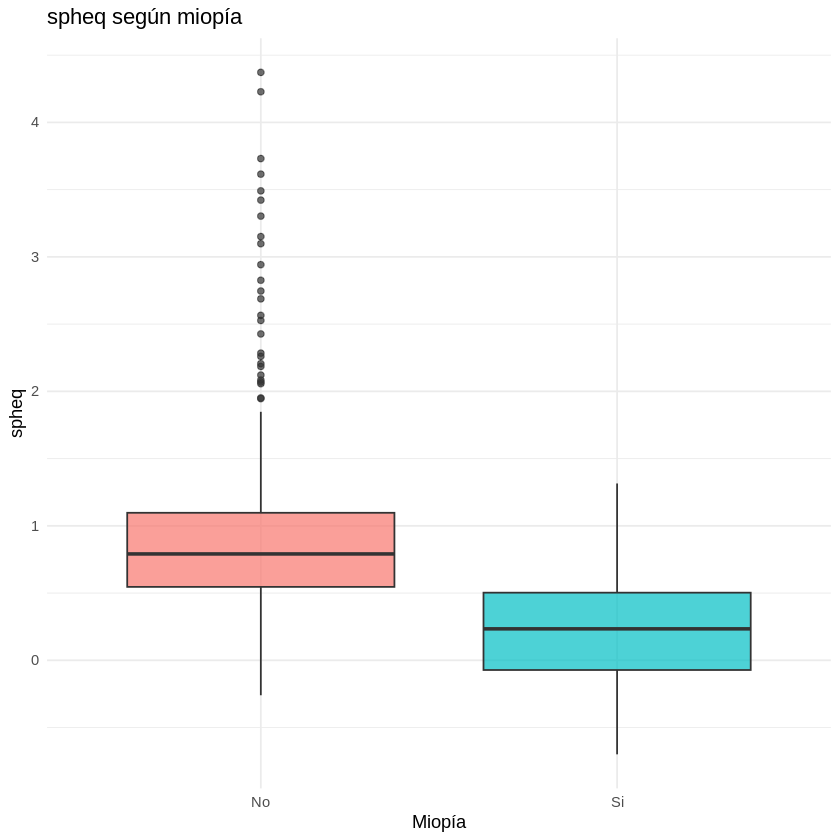

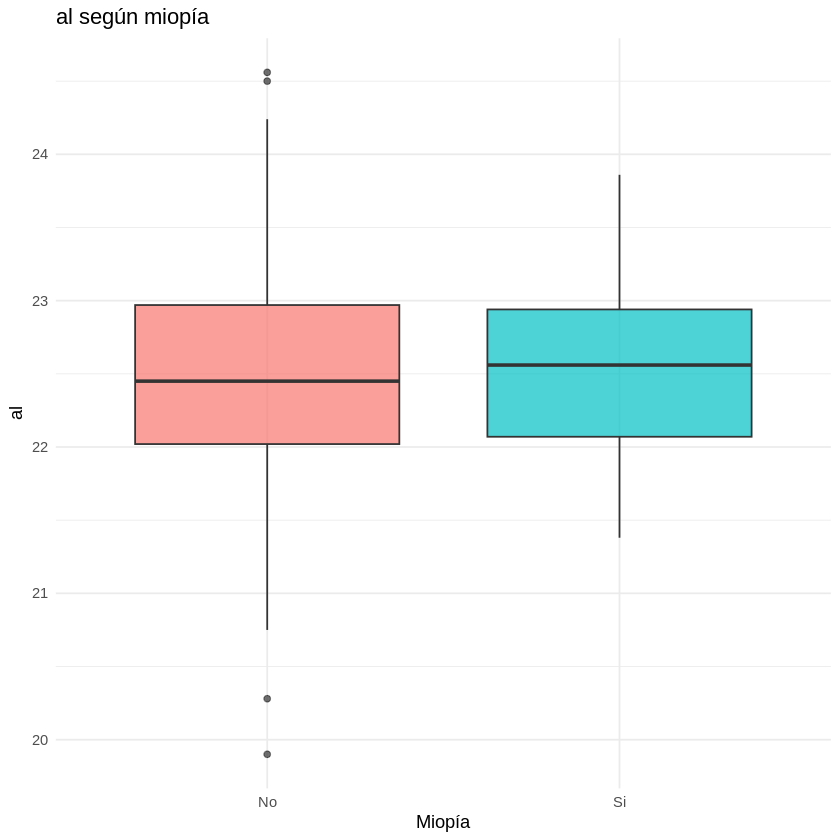

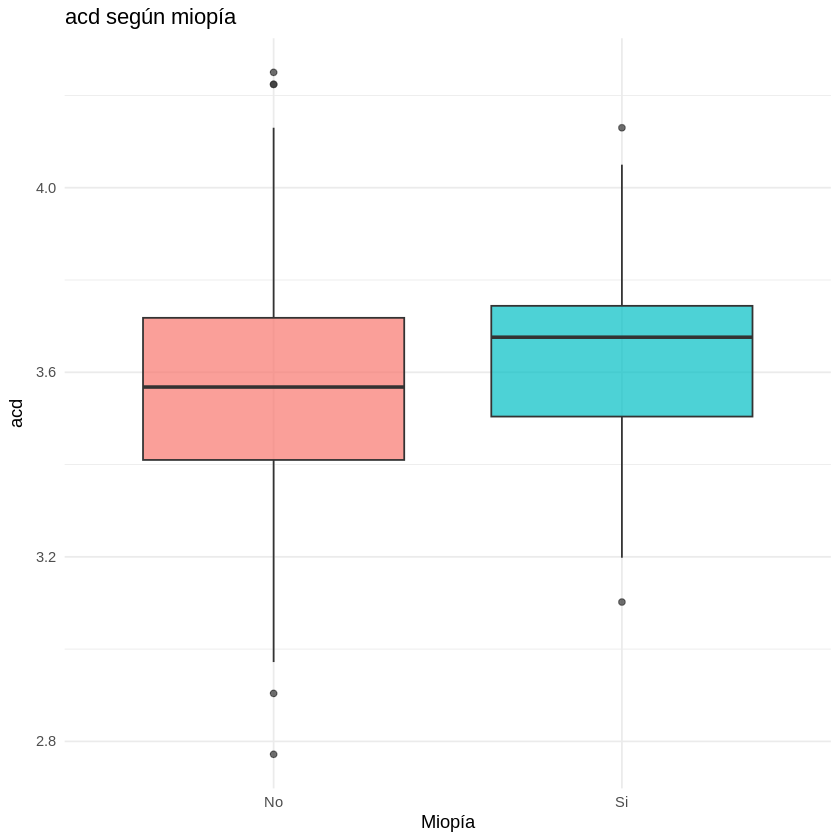

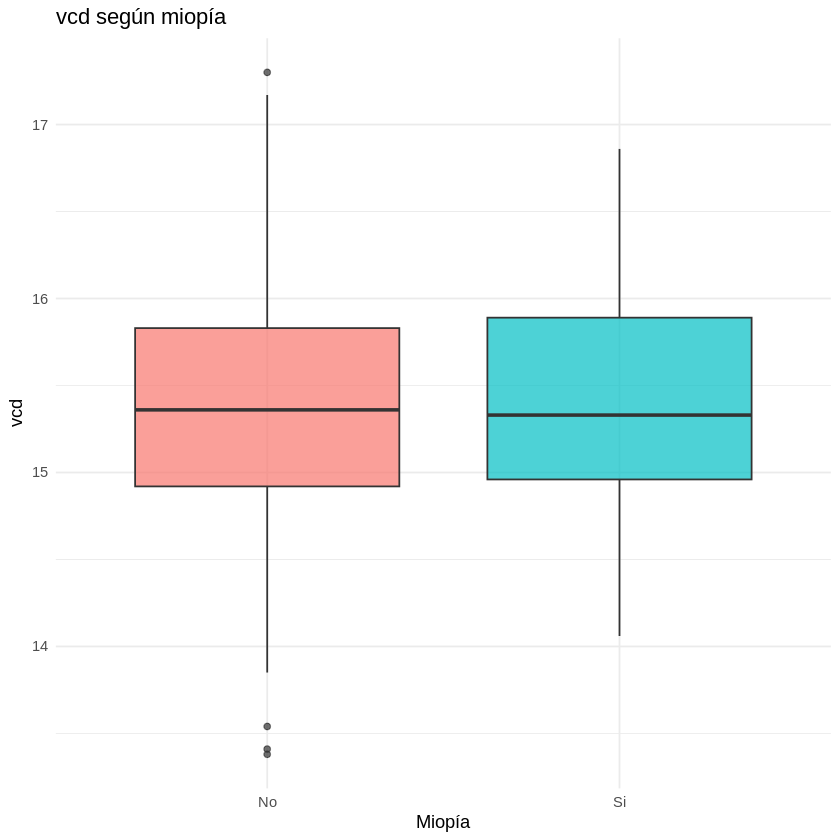

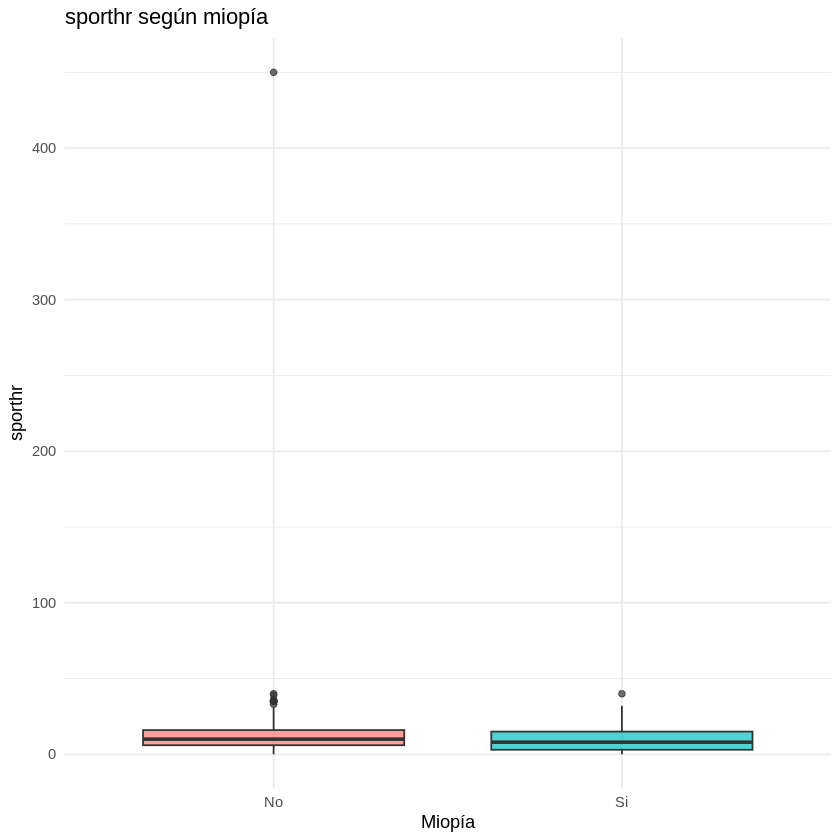

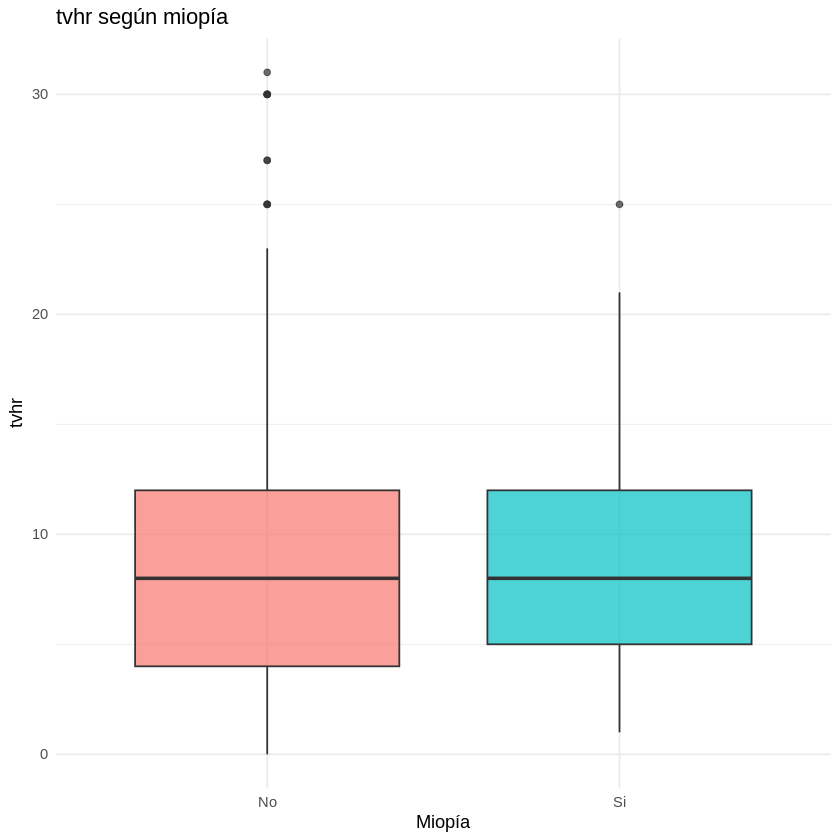

In [ ]:
## 1. Histogramas de variables numéricas + línea de densidad
num_vars <- c("spheq", "al", "acd", "vcd", "sporthr", "tvhr")
for (v in num_vars) {
  print(
    ggplot(datos, aes_string(x = v)) +
      geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue", color = "black", alpha = 0.6) +
      geom_density(color = "red", size = 1.2) +
      labs(title = paste("Histograma y densidad de", v), x = v, y = "Densidad") +
      theme_minimal()
  )
}

# 2. Boxplots de variables numéricas por miopía
for (v in num_vars) {
  print(
    ggplot(datos, aes_string(x = "mio", y = v, fill = "mio")) +
      geom_boxplot(alpha = 0.7) +
      labs(title = paste(v, "según miopía"), x = "Miopía", y = v) +
      theme_minimal() +
      theme(legend.position = "none")
  )
}


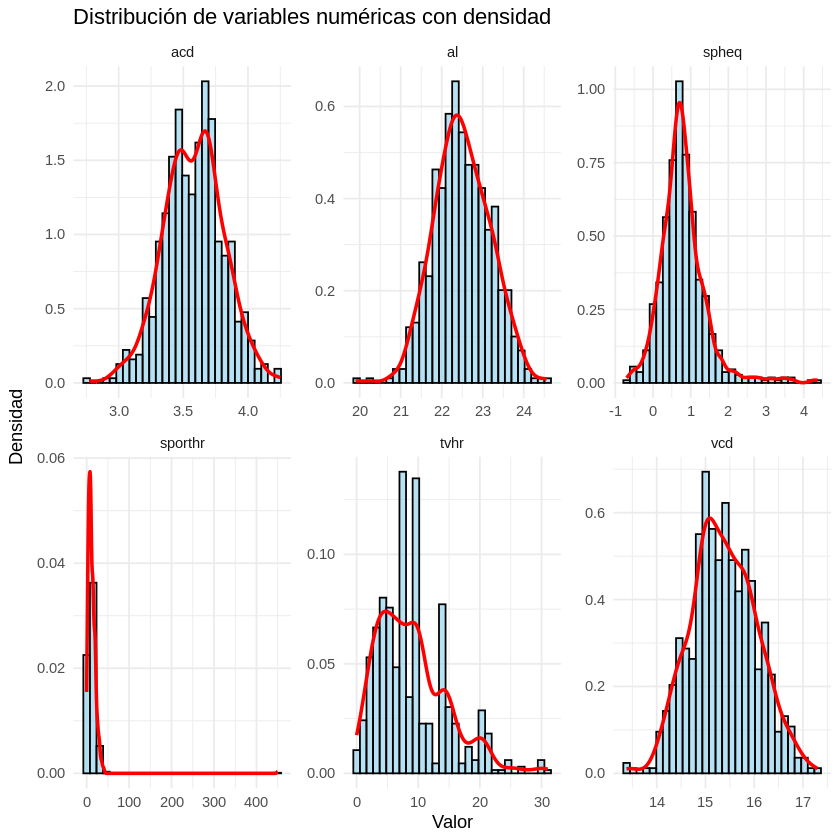

In [ ]:
library(tidyverse)

# 1. Llevar a formato largo
datos_long <- datos %>%
  pivot_longer(
    cols = c("spheq", "al", "acd", "vcd", "sporthr", "tvhr"),
    names_to = "variable",
    values_to = "valor"
  )

# 2. Graficar todos juntos con facet_wrap
ggplot(datos_long, aes(x = valor)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue", color = "black", alpha = 0.6) +
  geom_density(color = "red", size = 1) +
  facet_wrap(~ variable, scales = "free", ncol = 3) +
  labs(title = "Distribución de variables numéricas con densidad",
       x = "Valor", y = "Densidad") +
  theme_minimal()


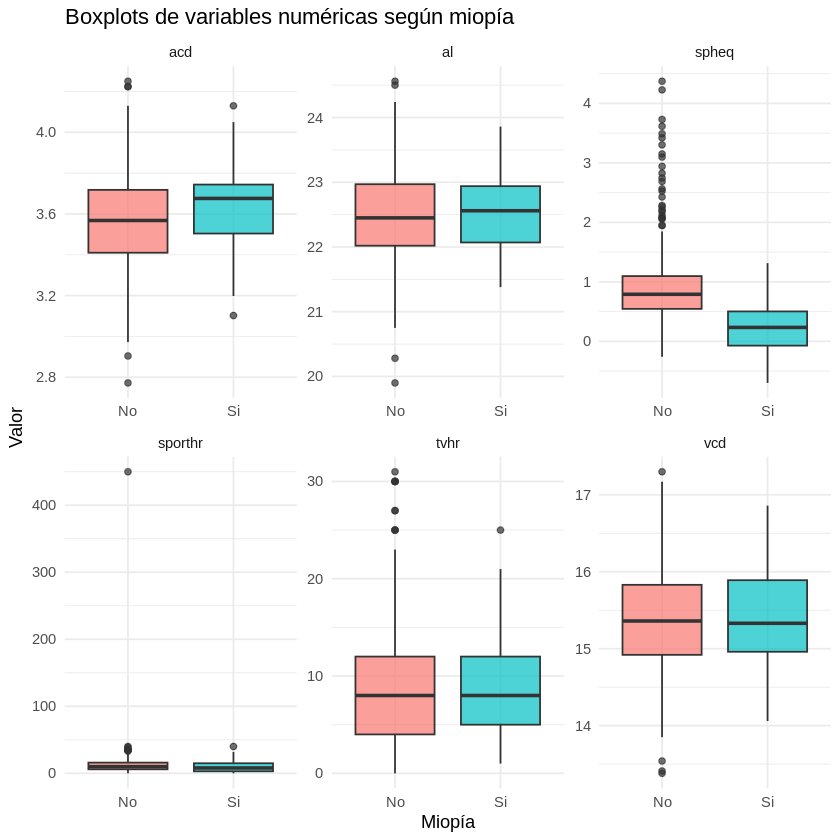

In [ ]:
library(tidyverse)

# Pasar a formato largo
datos_long <- datos %>%
  pivot_longer(
    cols = c("spheq", "al", "acd", "vcd", "sporthr", "tvhr"),
    names_to = "variable",
    values_to = "valor"
  )

# Boxplots de todas las variables numéricas según miopía
ggplot(datos_long, aes(x = mio, y = valor, fill = mio)) +
  geom_boxplot(alpha = 0.7) +
  facet_wrap(~ variable, scales = "free", ncol = 3) +
  labs(title = "Boxplots de variables numéricas según miopía",
       x = "Miopía",
       y = "Valor") +
  theme_minimal() +
  theme(legend.position = "none")

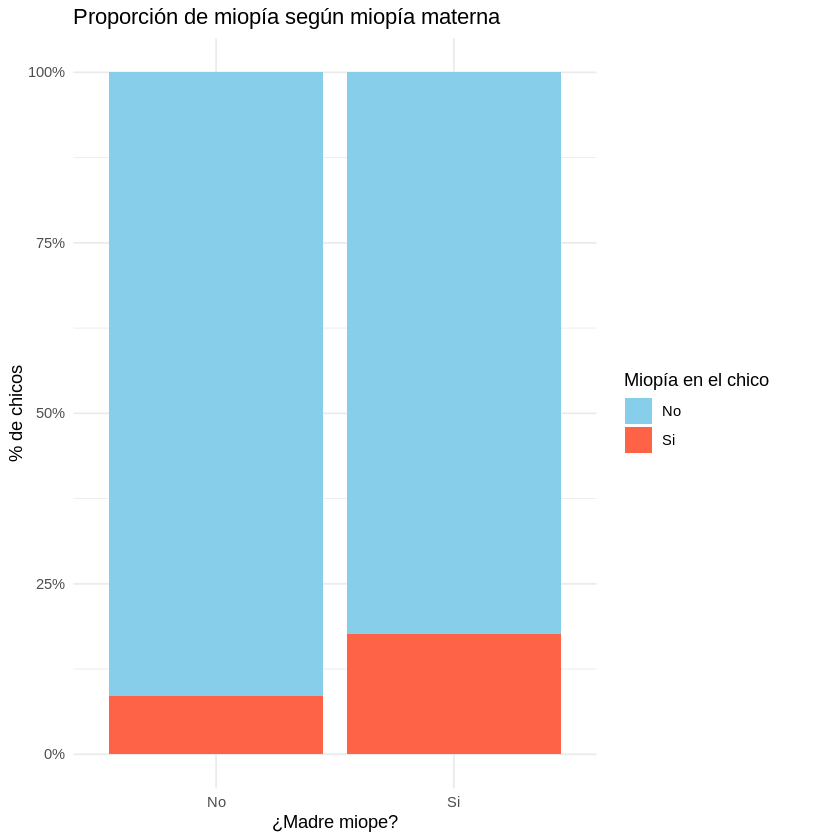

In [ ]:
# 3. Gráfico de barras de miopía según miopía materna
ggplot(datos, aes(x = ma, fill = mio)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Proporción de miopía según miopía materna",
       x = "¿Madre miope?",
       y = "% de chicos") +
  theme_minimal() +
  scale_fill_manual(values = c("skyblue", "tomato"), name = "Miopía en el chico")

# **DIVISIÓN DEL DATASET** (Punto 2)
Punto 2.       Se quiere ajustar modelos de regresión logística que permitan relacionar la miopía con las variables medidas. Para esto, antes que nada, separar los datos en conjuntos de entrenamiento y validación en forma aleatoria en 70/30. Indique que cantidad de casos quedaron para cada ambiente.

In [ ]:
#División del dataset (train and test)
##Instalación de paquetes y librerias necesarios
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#División con criterio 70% Train / 30% Test
set.seed(666)
train <- createDataPartition(datos$mio, p=0.7, list=FALSE)
dataTrain <- datos[train, ]
dataTest <- datos[-train, ]
cat("Cantidad de casos para entrenamiento (Train):", nrow(dataTrain), "\n")
cat("Cantidad de casos para validación (Test):", nrow(dataTest), "\n")

Cantidad de casos para entrenamiento (Train): 433 
Cantidad de casos para validación (Test): 185 


# **MODELOS DE REGRESIÓN** (Puntos 3 y 4)

Punto 3.       Considere los siguientes modelos y compárelos adecuadamente en el conjunto de entrenamiento:
-          Modelo1: un modelo con todas las variables disponibles.
-          Modelo2: seleccionando con step sobre todas las variables disponibles.
-          Modelo3: un modelo a su elección.

In [ ]:
# Modelo 1: Regresión Logística Múltiple con todas las variables disponibles
mod1 <- glm(mio ~., data = dataTrain, family = binomial())
summary(mod1)


Call:
glm(formula = mio ~ ., family = binomial(), data = dataTrain)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 10.39155    9.04627   1.149   0.2507    
spheq       -3.93726    0.53192  -7.402 1.34e-13 ***
al          -0.69550    1.37982  -0.504   0.6142    
acd          1.60680    1.38359   1.161   0.2455    
vcd         -0.01078    1.28550  -0.008   0.9933    
sporthr     -0.04344    0.02404  -1.807   0.0708 .  
tvhr        -0.02873    0.03138  -0.916   0.3599    
maSi         0.82288    0.36395   2.261   0.0238 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 337.30  on 432  degrees of freedom
Residual deviance: 227.85  on 425  degrees of freedom
AIC: 243.85

Number of Fisher Scoring iterations: 7


In [ ]:
# Modelo 2: seleccionando con step sobre todas las variables disponibles
mod2 <- step(mod1, direction = "backward", trace = F, data = dataTrain)
summary(mod2)


Call:
glm(formula = mio ~ spheq + al + acd + sporthr + ma, family = binomial(), 
    data = dataTrain)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 10.77407    6.05836   1.778   0.0753 .  
spheq       -3.90968    0.52989  -7.378  1.6e-13 ***
al          -0.74653    0.30362  -2.459   0.0139 *  
acd          1.71730    0.87850   1.955   0.0506 .  
sporthr     -0.04763    0.02370  -2.010   0.0444 *  
maSi         0.79445    0.36120   2.199   0.0278 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 337.30  on 432  degrees of freedom
Residual deviance: 228.73  on 427  degrees of freedom
AIC: 240.73

Number of Fisher Scoring iterations: 7


In [ ]:
# Modelo 3: un modelo a elección
mod3 <- glm(mio ~ spheq+al+sporthr+ma, data = dataTrain, family = binomial())
summary(mod3)


Call:
glm(formula = mio ~ spheq + al + sporthr + ma, family = binomial(), 
    data = dataTrain)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 10.84453    5.98397   1.812   0.0699 .  
spheq       -3.83313    0.52038  -7.366 1.76e-13 ***
al          -0.47969    0.26437  -1.814   0.0696 .  
sporthr     -0.04096    0.02290  -1.789   0.0736 .  
maSi         0.82820    0.36111   2.294   0.0218 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 337.30  on 432  degrees of freedom
Residual deviance: 232.63  on 428  degrees of freedom
AIC: 242.63

Number of Fisher Scoring iterations: 6


In [ ]:
# Comparación de los 3 modelos con devianzas y AIC: mod1, mod2 y mod3
anova(mod1,mod2,mod3) #mod3 significativo respecto a mod1
AIC(mod1,mod2,mod3) #mod2 mejor AIC

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,425,227.8453,NA,NA,NA
2,427,228.7277,-2,-0.882428,0.64325504
3,428,232.6305,-1,-3.902840,0.04820455


,df,AIC
,<dbl>,<dbl>
mod1,8,243.8453
mod2,6,240.7277
mod3,5,242.6305


Punto 4.       Para el modelo elegido en el punto anterior (seguramente ya consideró alguno de estos ítems, se pide aquí que los muestre en el modelo elegido).

a)   ¿Son todas las variables significativas?

b)   Considere un test de bondad de ajuste: ¿qué conclusión se obtiene?

c)   Elija uno de los coeficientes del modelo elegido e interprételo en términos de los odds.

d)   ¿Hay problemas de multicolinealidad en las regresoras?

e)   ¿Hay datos influyentes? ¿Los mantuvo en el dataset o los quitó?

In [ ]:
# a) Variables significativas
summary(mod3)


Call:
glm(formula = mio ~ spheq + al + sporthr + ma, family = binomial(), 
    data = dataTrain)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 10.84453    5.98397   1.812   0.0699 .  
spheq       -3.83313    0.52038  -7.366 1.76e-13 ***
al          -0.47969    0.26437  -1.814   0.0696 .  
sporthr     -0.04096    0.02290  -1.789   0.0736 .  
maSi         0.82820    0.36111   2.294   0.0218 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 337.30  on 432  degrees of freedom
Residual deviance: 232.63  on 428  degrees of freedom
AIC: 242.63

Number of Fisher Scoring iterations: 6


In [ ]:
# b) Test H-L
#H0: El modelo se ajusta bien a los datos observados
#H1: El modelo no se ajusta bien a los datos observados
install.packages("ResourceSelection")
library(ResourceSelection)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
hoslem.test(as.numeric(dataTrain$mio), fitted(mod3))
#p-value < 2.2e-16 => pvalor chico, hay evidencia para rechazar H0 --> el modelo no ajusta bien, hay diferencia significativa entre lo predicho y lo observado


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  as.numeric(dataTrain$mio), fitted(mod3)
X-squared = 58370, df = 8, p-value < 2.2e-16


In [ ]:
# c) Interpretacion del modelo en terminos de odds
exp(coef(mod3))

(Intercept)        spheq           al      sporthr         maSi 
5.125310e+04 2.164176e-02 6.189747e-01 9.598645e-01 2.289191e+00

In [ ]:
# d) Multicolinealidad --> VIF en regresión logistica
library(car)
car::vif(mod3) #todos valores menores a 5 --> VIF<5 => todas las variables

spheq       al  sporthr       ma 
1.074727 1.092407 1.012773 1.034995

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
1,1.373709,0.141993445,0.050377020
96,2.545187,0.005610288,0.025998857
160,2.618051,0.008599612,0.046285180
201,-0.630223,0.078900399,0.003883948
202,2.404535,0.023347126,0.069505802


Potentially influential observations of
	 glm(formula = mio ~ spheq + al + sporthr + ma, family = binomial(),      data = dataTrain) :

    dfb.1_ dfb.sphq dfb.al dfb.sprt dfb.maSi dffit   cov.r   cook.d hat    
1    0.22  -0.20    -0.24   0.66     0.18     0.77_*  1.13_*  0.05   0.14_*
3    0.02   0.07    -0.02   0.15    -0.18     0.29    0.91_*  0.02   0.01  
11   0.09  -0.03    -0.09   0.02     0.00    -0.11    1.04_*  0.00   0.03  
13   0.11   0.02    -0.12   0.09     0.12    -0.20    1.04_*  0.00   0.04_*
33  -0.05   0.06     0.07  -0.17    -0.23     0.33_*  0.93_*  0.02   0.01  
51  -0.21  -0.11     0.21   0.06     0.08     0.34_*  1.01    0.01   0.03  
53  -0.06  -0.18     0.08  -0.04    -0.11     0.26    1.06_*  0.00   0.06_*
56   0.23   0.03    -0.24   0.05    -0.03    -0.29    1.05_*  0.01   0.05_*
58   0.10   0.07    -0.12   0.12     0.16    -0.26    1.04_*  0.00   0.04_*
91   0.01   0.02    -0.01   0.00     0.12     0.21    0.96_*  0.01   0.01  
96  -0.12   0.13     0.12   

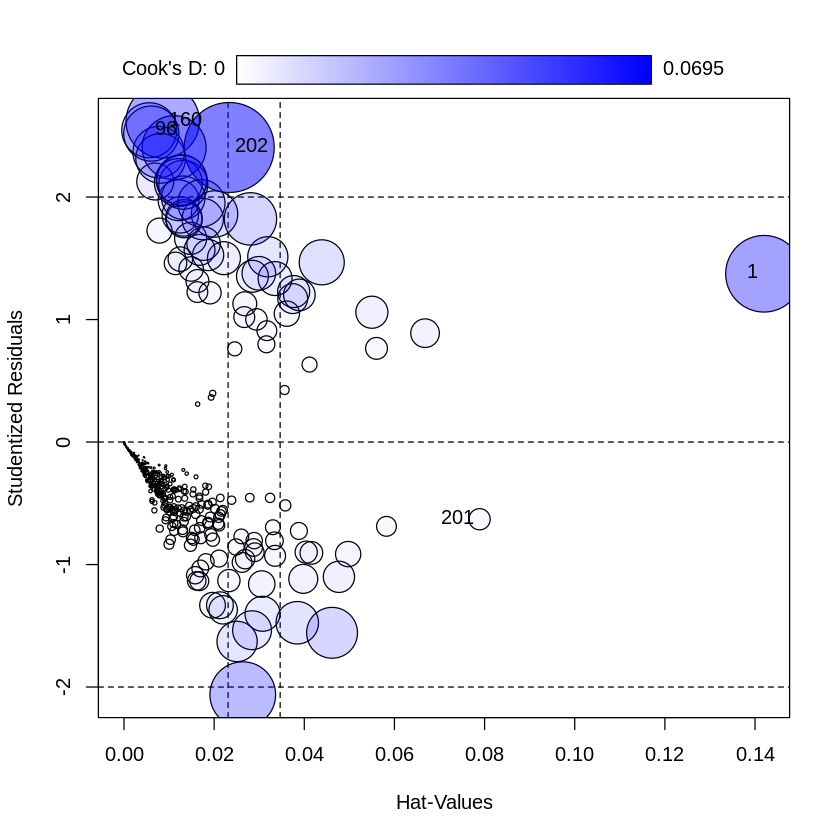

In [ ]:
# e) Datos influyentes
influencePlot(mod3)
summary(influence.measures(mod3))

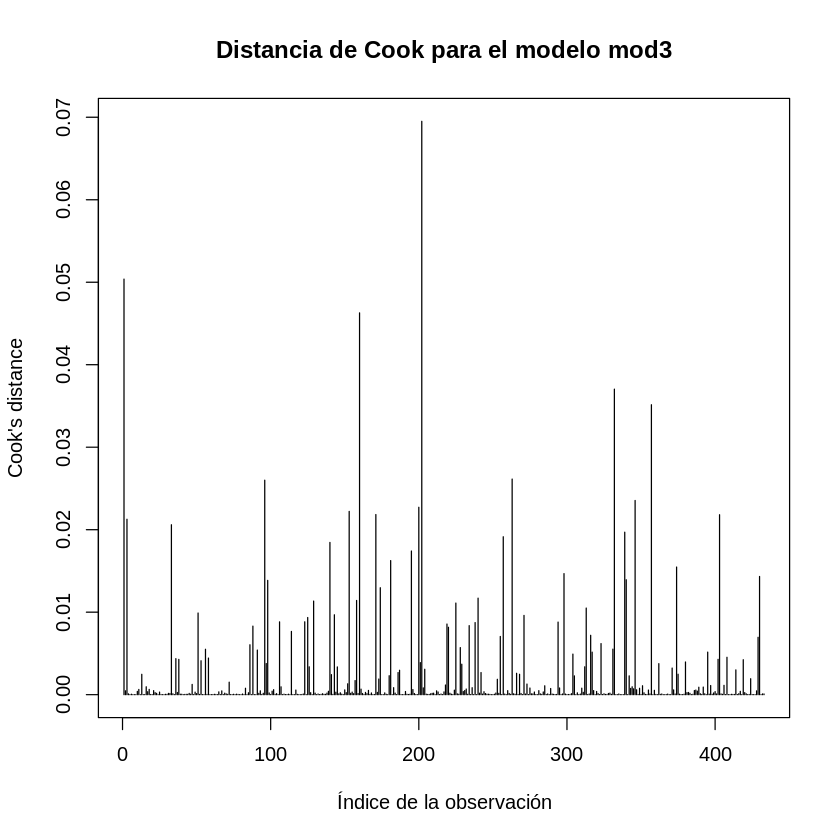

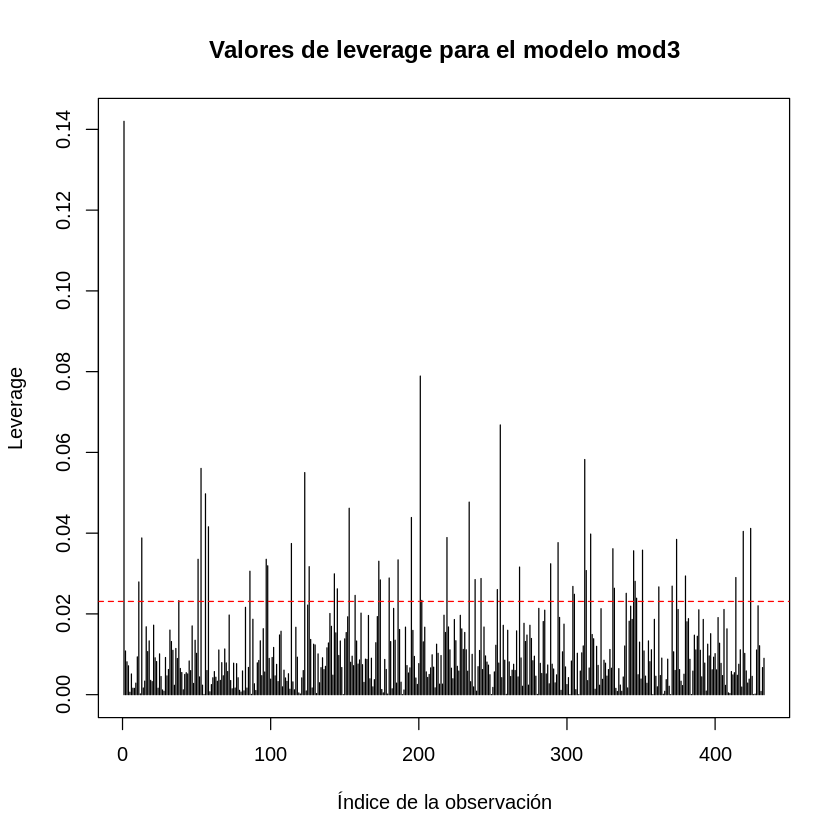

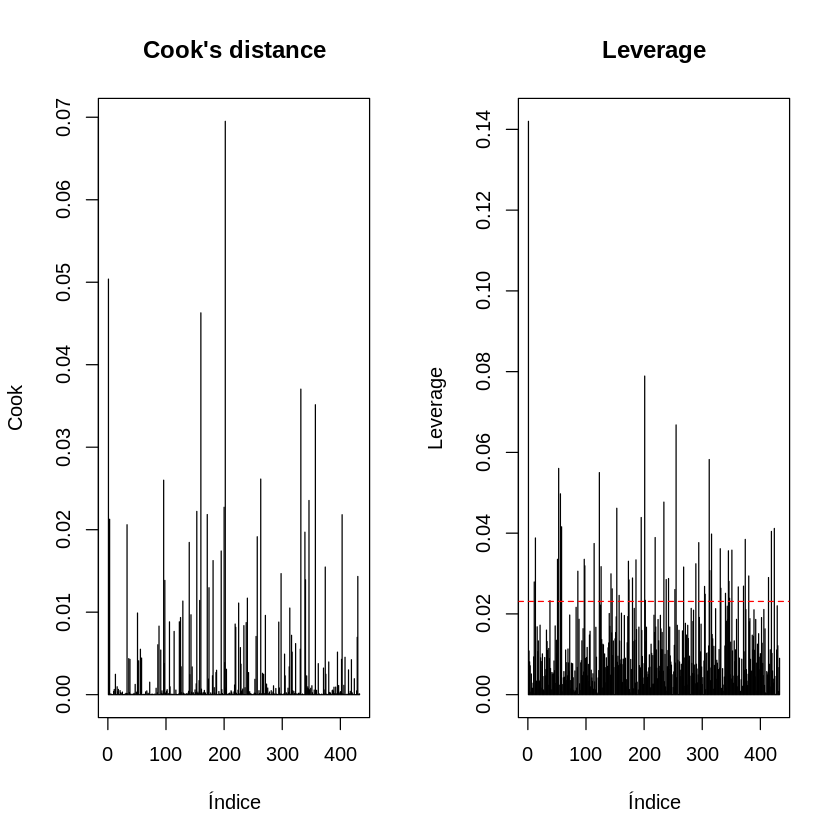

In [ ]:
# Distancia de Cook: mide la influencia de cada punto en el ajuste del modelo
plot(cooks.distance(mod3), type = "h",
     main = "Distancia de Cook para el modelo mod3",
     xlab = "Índice de la observación",
     ylab = "Cook's distance")
abline(h = 1, col = "red", lty = 2)  # umbral típico de atención

# Valores de leverage (hatvalues): identifica observaciones con alto "poder" para influir en la predicción
plot(hatvalues(mod3), type = "h",
     main = "Valores de leverage para el modelo mod3",
     xlab = "Índice de la observación",
     ylab = "Leverage")
abline(h = 2 * (length(coef(mod3)) / nrow(model.matrix(mod3))),
       col = "red", lty = 2)  # umbral sugerido para leverage alto

# Para ver ambas métricas
par(mfrow = c(1, 2))
plot(cooks.distance(mod3), type = "h", main = "Cook's distance", xlab = "Índice", ylab = "Cook")
abline(h = 1, col = "red", lty = 2)
plot(hatvalues(mod3), type = "h", main = "Leverage", xlab = "Índice", ylab = "Leverage")
abline(h = 2 * (length(coef(mod3)) / nrow(model.matrix(mod3))), col = "red", lty = 2)
par(mfrow = c(1, 1))

# **NAIVE BAYES** (Punto 5)

In [ ]:
install.packages("e1071")
library(e1071)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




ERROR: Error in library(caret): there is no package called ‘caret’


In [ ]:
# Ajustar modelo Naive Bayes (usando all variables)
nb_model <- naiveBayes(mio ~ ., data = dataTrain)

# Predicciones sobre el conjunto de prueba
nb_pred <- predict(nb_model, newdata = dataTest)

# Matriz de confusión y métricas
confusion <- confusionMatrix(nb_pred, dataTest$mio, positive= "Si")
print(confusion)

# Métricas principales
accuracy <- confusion$overall['Accuracy']
kappa <- confusion$overall['Kappa']
print(accuracy)
print(kappa)

ERROR: Error in naiveBayes(mio ~ ., data = dataTrain): could not find function "naiveBayes"


# Punto 6: Comparacion de modelos del punto 4 y 5

Area under the curve: 0.891
Area under the curve: 0.8429


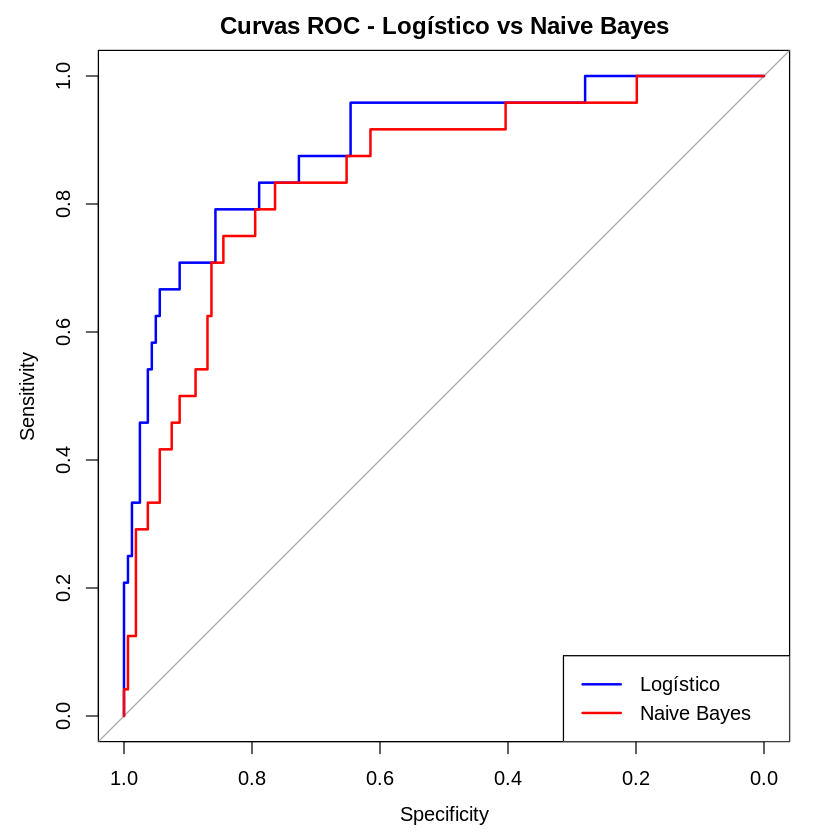

In [ ]:
##a) Indique AUC y grafique la curva ROC en el conjunto de test.
library(pROC) # Load the pROC library

log_prob <- predict(mod3, newdata = dataTest, type = "response")

# Curva ROC y AUC
roc_log <- roc(dataTest$mio, log_prob, levels = c("No", "Si"), direction = "<")
plot(roc_log, col = "blue", main = "Curvas ROC - Logístico vs Naive Bayes")
auc_log <- auc(roc_log)
print(auc_log)

#  NAIVE BAYES (ajustado en dataTrain)
nb_prob <- predict(nb_model, newdata = dataTest, type = "raw")[, "Si"]

# Curva ROC y AUC para Naive Bayes (agrega a la misma gráfica)
roc_nb <- roc(dataTest$mio, nb_prob, levels = c("No", "Si"), direction = "<")
lines(roc_nb, col = "red")
auc_nb <- auc(roc_nb)
print(auc_nb)

legend("bottomright", legend = c("Logístico", "Naive Bayes"),
       col = c("blue", "red"), lwd = 2)

b

In [ ]:
# Umbral por defecto 0.5 para clasificación
log_pred_class <- ifelse(log_prob >= 0.5, "Si", "No") %>% factor(levels = c("No", "Si"))
nb_pred_class <- predict(nb_model, newdata = dataTest) # ya es factor

# Matriz de confusión y métricas para REGRESIÓN LOGÍSTICA
conf_log <- confusionMatrix(log_pred_class, dataTest$mio, positive = "Si")
print(conf_log)

# Matriz de confusión y métricas para NAIVE BAYES
conf_nb <- confusionMatrix(nb_pred_class, dataTest$mio, positive = "Si")
print(conf_nb)

Confusion Matrix and Statistics

          Reference
Prediction  No  Si
        No 157  14
        Si   4  10
                                          
               Accuracy : 0.9027          
                 95% CI : (0.8506, 0.9413)
    No Information Rate : 0.8703          
    P-Value [Acc > NIR] : 0.11155         
                                          
                  Kappa : 0.4763          
                                          
 Mcnemar's Test P-Value : 0.03389         
                                          
            Sensitivity : 0.41667         
            Specificity : 0.97516         
         Pos Pred Value : 0.71429         
         Neg Pred Value : 0.91813         
             Prevalence : 0.12973         
         Detection Rate : 0.05405         
   Detection Prevalence : 0.07568         
      Balanced Accuracy : 0.69591         
                                          
       'Positive' Class : Si              
                              

# Punto 7: Selección de modelos

In [ ]:
install.packages("ROCR")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ROCR)
#Matrices de confusión: regresión y naive bayes
print(conf_log)
print(conf_nb)

# Se extraen métricas principales
acc_log   <- conf_log$overall["Accuracy"]
sens_log  <- conf_log$byClass["Sensitivity"]
spec_log  <- conf_log$byClass["Specificity"]
kappa_log <- conf_log$overall["Kappa"]

acc_nb    <- conf_nb$overall["Accuracy"]
sens_nb   <- conf_nb$byClass["Sensitivity"]
spec_nb   <- conf_nb$byClass["Specificity"]
kappa_nb  <- conf_nb$overall["Kappa"]

# Se crea la Tabla comparativa
comparativo <- data.frame(
  Modelo = c("Regresión Logística", "Naive Bayes"),
  Sensibilidad = c(sens_log, sens_nb),
  Especificidad = c(spec_log, spec_nb),
  Accuracy = c(acc_log, acc_nb),
  Kappa = c(kappa_log, kappa_nb),
  AUC = c(auc_log, auc_nb)
)
print(comparativo)

Confusion Matrix and Statistics

          Reference
Prediction  No  Si
        No 157  14
        Si   4  10
                                          
               Accuracy : 0.9027          
                 95% CI : (0.8506, 0.9413)
    No Information Rate : 0.8703          
    P-Value [Acc > NIR] : 0.11155         
                                          
                  Kappa : 0.4763          
                                          
 Mcnemar's Test P-Value : 0.03389         
                                          
            Sensitivity : 0.41667         
            Specificity : 0.97516         
         Pos Pred Value : 0.71429         
         Neg Pred Value : 0.91813         
             Prevalence : 0.12973         
         Detection Rate : 0.05405         
   Detection Prevalence : 0.07568         
      Balanced Accuracy : 0.69591         
                                          
       'Positive' Class : Si              
                              